## EXPERIMENT NO:- 2 ##

### Title: Predicting Heart Disease Using Linear and Non-Linear Regression Techniques 

In [50]:
import pandas as pd  #importing the library 

disease_data = 'heart_disease.csv'

data = pd.read_csv(disease_data)  #Reading the Csv file 
data.head()

,Age,Gender,Blood Pressure,Cholesterol Level,Exercise Habits,Smoking,Family Heart Disease,Diabetes,BMI,High Blood Pressure,...,High LDL Cholesterol,Alcohol Consumption,Stress Level,Sleep Hours,Sugar Consumption,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level,Heart Disease Status
0,56.0,Male,153.0,155.0,High,Yes,Yes,No,24.991591,Yes,...,No,High,Medium,7.633228,Medium,342.0,NaN,12.969246,12.387250,No
1,69.0,Female,146.0,286.0,High,No,Yes,Yes,25.221799,No,...,No,Medium,High,8.744034,Medium,133.0,157.0,9.355389,19.298875,No
2,46.0,Male,126.0,216.0,Low,No,No,No,29.855447,No,...,Yes,Low,Low,4.440440,Low,393.0,92.0,12.709873,11.230926,No
3,32.0,Female,122.0,293.0,High,Yes,Yes,No,24.130477,Yes,...,Yes,Low,High,5.249405,High,293.0,94.0,12.509046,5.961958,No
4,60.0,Male,166.0,242.0,Low,Yes,Yes,Yes,20.486289,Yes,...,No,Low,High,7.030971,High,263.0,154.0,10.381259,8.153887,No


In [51]:
data_subset = data[['Age', 'Blood Pressure', 'Cholesterol Level']]

# Drop rows with missing values Blood Pressurein the selected columns
data_subset = data_subset.dropna()
data_subset.columns = ['Age', 'Blood Pressure', 'Cholesterol Level']
data_subset.head()


,Age,Blood Pressure,Cholesterol Level
0,56.0,153.0,155.0
1,69.0,146.0,286.0
2,46.0,126.0,216.0
3,32.0,122.0,293.0
4,60.0,166.0,242.0


The cleaned dataset contains three relevant columns:

Age: Age of adult.
Blood Pressure	: Blood Pressure of adult.
Cholesterol Level: Cholesterol Level of adult (target variable)

### Now, I'll proceed with implementing Linear Regression, Non-Linear Regression, Curve Fitting, and the error evaluation metrics (MSE and MAE).

In [52]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

### Splitting the data into features and target


In [53]:
X = data_subset[['Age', 'Blood Pressure']]
y = data_subset['Cholesterol Level']

### Splitting into training and testing sets

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Standardizing the data

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Linear Regression

In [56]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
y_pred_linear = linear_model.predict(X_test_scaled)

# Evaluate Linear Regression
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)


## Polynomial (Non-Linear) Regression

In [57]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate Polynomial Regression
mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

## Curve Fitting

In [58]:
# Define a custom curve function (e.g., exponential growth)
def curve_func(x, a, b, c):
    return a * np.exp(b * x[:, 0]) + c * x[:, 1]

popt, _ = curve_fit(curve_func, X_train_scaled, y_train)
y_pred_curve = curve_func(X_test_scaled, *popt)

# Evaluate Curve Fitting
mse_curve = mean_squared_error(y_test, y_pred_curve)
mae_curve = mean_absolute_error(y_test, y_pred_curve)

## Plot Results

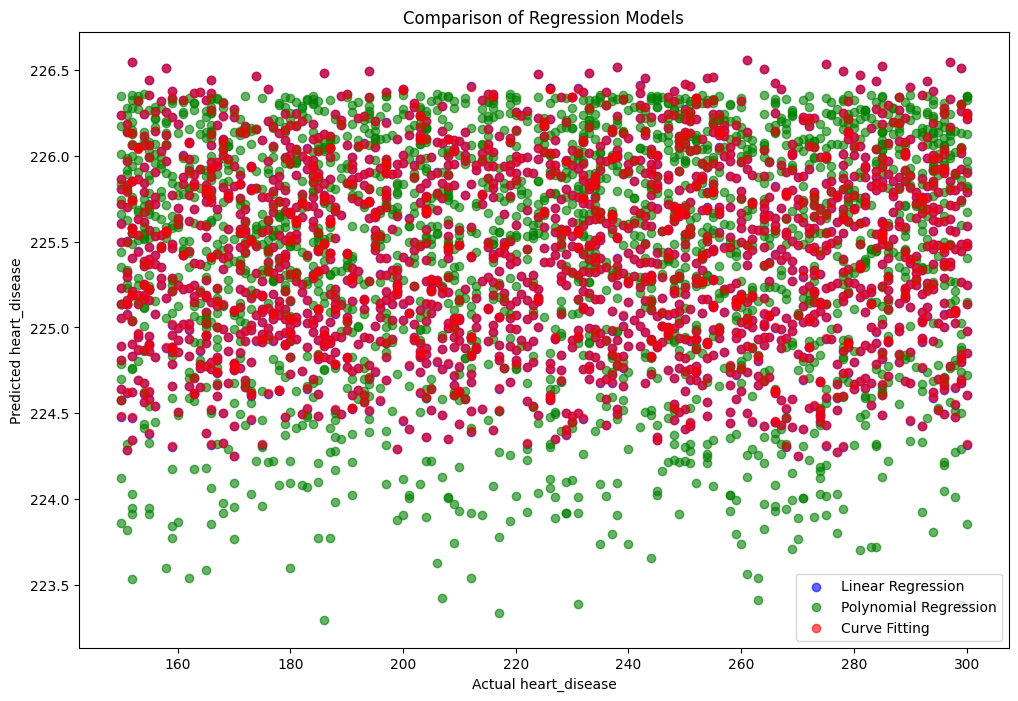

Model Evaluation Metrics:
Linear Regression - MSE: 1950.8646, MAE: 38.4469
Polynomial Regression - MSE: 1951.0163, MAE: 38.4486
Curve Fitting - MSE: 1950.8641, MAE: 38.4469


In [59]:
plt.figure(figsize=(12, 8))

# Linear Regression
plt.scatter(y_test, y_pred_linear, color='blue', alpha=0.6, label='Linear Regression')

# Polynomial Regression
plt.scatter(y_test, y_pred_poly, color='green', alpha=0.6, label='Polynomial Regression')

# Curve Fitting
plt.scatter(y_test, y_pred_curve, color='red', alpha=0.6, label='Curve Fitting')

plt.xlabel("Actual heart_disease")
plt.ylabel("Predicted heart_disease")
plt.legend()
plt.title("Comparison of Regression Models")
plt.show()

# ---------- Print Evaluation Metrics ----------
print("Model Evaluation Metrics:")
print(f"Linear Regression - MSE: {mse_linear:.4f}, MAE: {mae_linear:.4f}")
print(f"Polynomial Regression - MSE: {mse_poly:.4f}, MAE: {mae_poly:.4f}")
print(f"Curve Fitting - MSE: {mse_curve:.4f}, MAE: {mae_curve:.4f}")